# Proyecto Regresión Lineal - Luis Alpizar

## Predecir el coste del seguro médico de una persona

La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos los fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

## Paso 0: Importar Librerias

In [1]:
# Importacion de Librerias
# Registro
import logging

# Manejo de Datos y Análisis
import pandas as pd
import numpy as np

# Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocesamiento
from sklearn.model_selection import train_test_split # División de Datos Test / Train
from sklearn.preprocessing import (
    OneHotEncoder, MinMaxScaler
)

#Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Machine Learning
from sklearn.linear_model import LinearRegression #Modelado - Linear Regression Model
#Metricas
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    accuracy_score
)
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.inspection import permutation_importance



# Configuración del registro
logger = logging.getLogger()
logger.setLevel(logging.ERROR)



## Paso 1: Carga del dataset

In [2]:
url = ('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df_raw = pd.read_csv(url)
df_raw.info()
df_raw.sample(10, random_state= 2025)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
1269,45,male,27.500,3,no,southwest,8615.30000
942,18,female,40.185,0,no,northeast,2217.46915
1240,52,male,41.800,2,yes,southeast,47269.85400
1229,58,male,30.305,0,no,northeast,11938.25595
272,41,male,37.050,2,no,northwest,7265.70250
738,23,male,31.730,3,yes,northeast,36189.10170
1105,54,female,31.240,0,no,southeast,10338.93160
1182,25,female,30.300,0,no,southwest,2632.99200
14,27,male,42.130,0,yes,southeast,39611.75770
596,42,female,29.480,2,no,southeast,7640.30920



## 2. Data preprocessing

In [3]:
df_baking = df_raw.copy()
df_baking['sex'] = df_baking['sex'].astype('category')
df_baking['smoker'] = df_baking['smoker'].astype('category')
df_baking['region'] = df_baking['region'].astype('category')

In [4]:
display(df_baking.describe(include='number').T)
display(df_baking.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [5]:
df = df_baking.copy()


## 3. Exploratory Data Analysis

In [6]:
df_train, df_test = train_test_split(df, random_state=2025,test_size=0.2)
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1070 non-null   int64   
 1   sex       1070 non-null   category
 2   bmi       1070 non-null   float64 
 3   children  1070 non-null   int64   
 4   smoker    1070 non-null   category
 5   region    1070 non-null   category
 6   charges   1070 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 37.1 KB


In [7]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.170093,14.174347,18.0000,26.000000,39.000000,51.00000,64.00000
bmi,1070.0,30.704542,6.113250,16.8150,26.315000,30.400000,34.69375,53.13000
children,1070.0,1.077570,1.200468,0.0000,0.000000,1.000000,2.00000,5.00000
charges,1070.0,13293.266695,12119.240247,1121.8739,4740.464375,9296.016525,16746.65740,63770.42801


,count,unique,top,freq
sex,1070,2,female,541
smoker,1070,2,no,850
region,1070,4,southeast,286


Analisis univariado

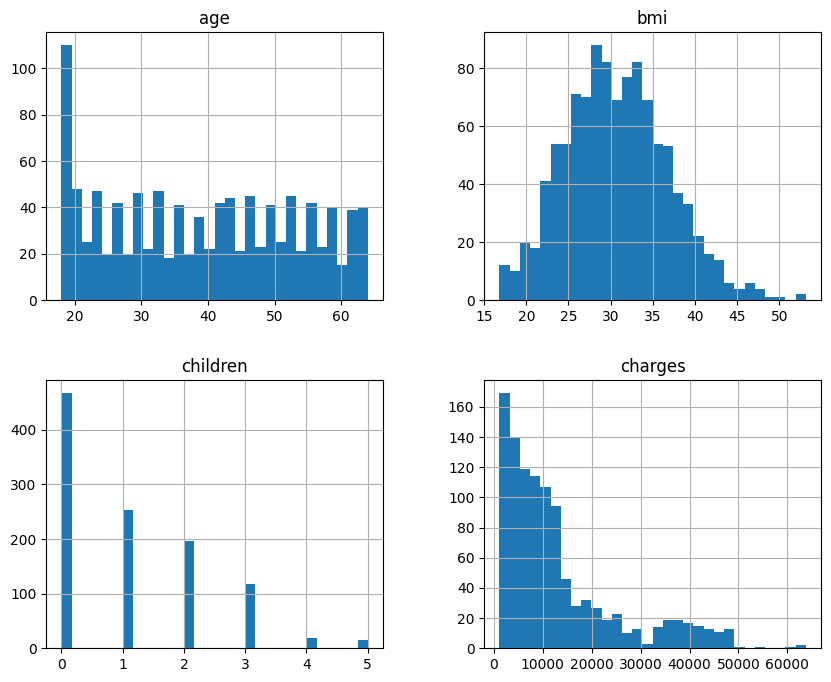

In [8]:
df_train.hist(bins=30, figsize=(10, 8))
plt.show()

- Análisis univariado de variables categóricas

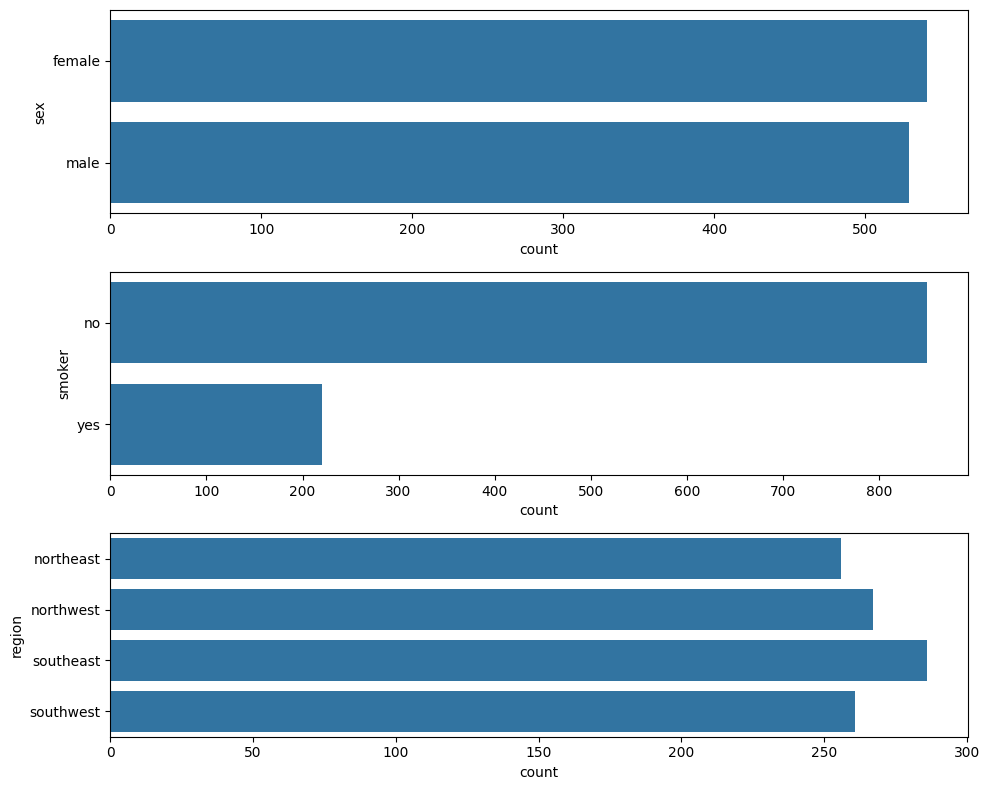

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8))  # Ajustar el tamaño de la figura


sns.countplot(data=df_train, y='sex', ax=ax[0])
sns.countplot(data=df_train, y='smoker', ax=ax[1])
sns.countplot(data=df_train, y='region', ax=ax[2])

plt.tight_layout()
plt.show()

- Analisis bivariado

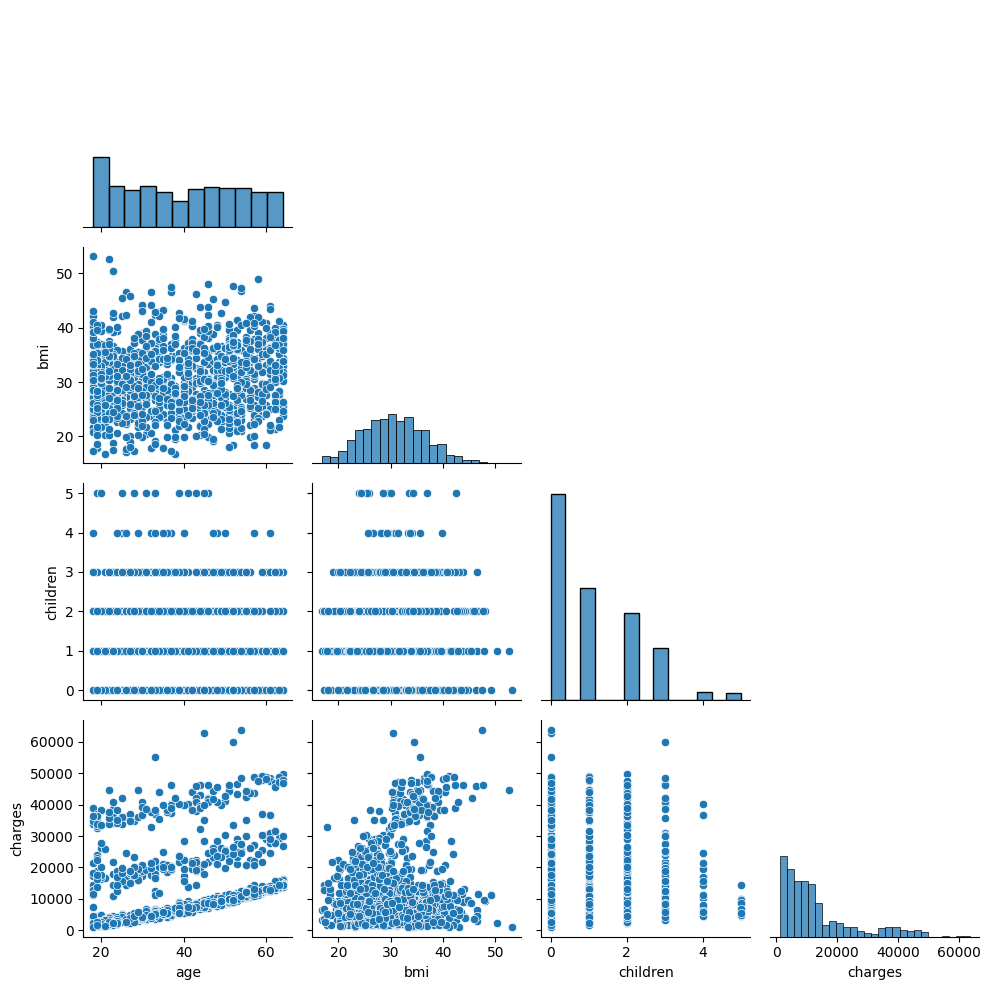

In [10]:
sns.pairplot(data=df_train, corner=True)
plt.tight_layout()
plt.show()

- Correalaciones

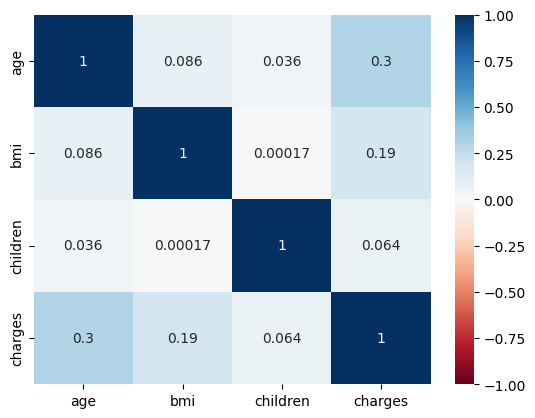

In [11]:
sns.heatmap(data=df_train.select_dtypes('number').corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.show()

### 3. Machine Learning

In [12]:
X_train = df_train.drop(['charges'],axis=1)
y_train = df_train['charges']

X_test = df_train.drop(['charges'],axis=1)
y_test = df_train['charges']

In [15]:
#Conversion para las variables independientes X, numericas y categoricas
num_cols = X_train.select_dtypes('number').columns #Columnas numericas
cat_cols = X_train.select_dtypes('category').columns #Columnas categoricas

#Procesador numerico, escalamos valores numericos en un rango de 0-1
num_proc = Pipeline(steps=[('scaler', MinMaxScaler())])
#Procesador categorico,
cat_proc = Pipeline(steps=[('onehotenc', OneHotEncoder(drop='first'))]) #Se tranforman los valores categoricos a numericos

y_proc = Pipeline(steps=[('scalerY', MinMaxScaler())])

#Agregamos ambos procesadores en uno solo
processor = ColumnTransformer(transformers=[
    ('cat',cat_proc, cat_cols),
    ('num', num_proc, num_cols),

])

In [16]:
clf_lr = Pipeline(steps = [
    ('proc', processor),
    ('lreg', LinearRegression())
])

In [17]:
clf_lr.fit(X_train,y_train,)

Pipeline(steps=[('proc',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['age', 'bmi', 'children'], dtype='object'))])),
                ('lreg', LinearRegression())])

In [18]:
y_hat = clf_lr.predict(X_test)
y_hat

array([ 1726.21137262,  7669.74740442, 31840.75946254, ...,
       16154.54175668, 14658.03677031, 15205.50518431], shape=(1070,))

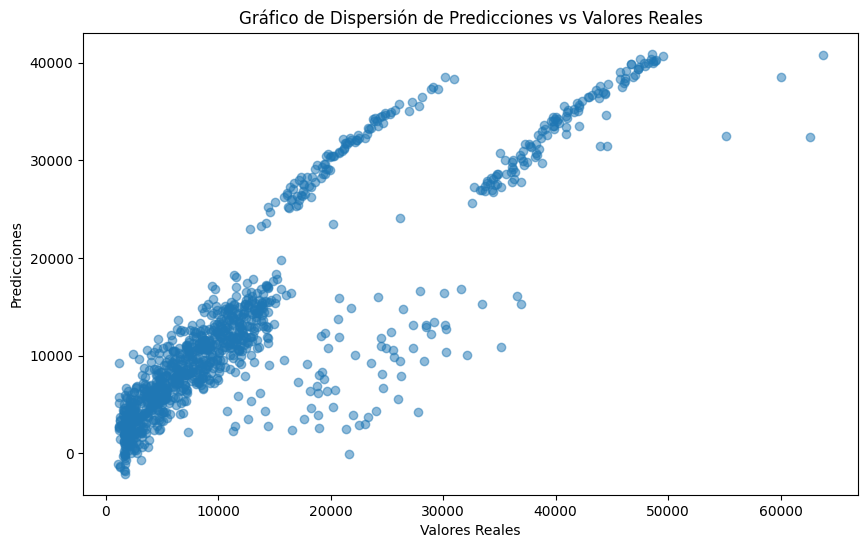

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión de Predicciones vs Valores Reales')
plt.show()

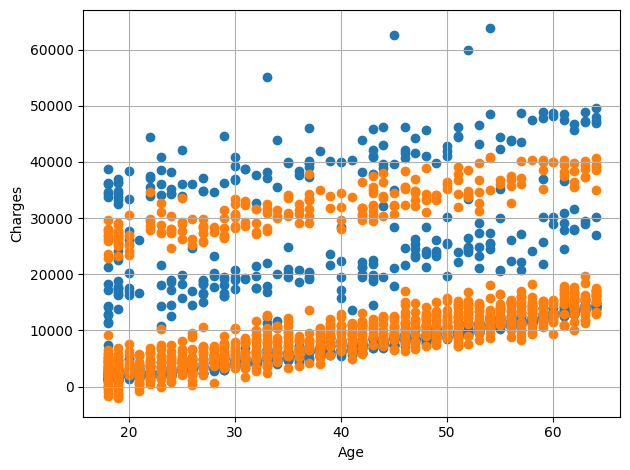

In [20]:
plt.scatter(df_train['age'],df_train['charges'])
plt.scatter(df_train['age'],y_hat)
plt.xlabel('Age')
plt.ylabel('Charges')

plt.grid(True)
plt.tight_layout()
plt.show()

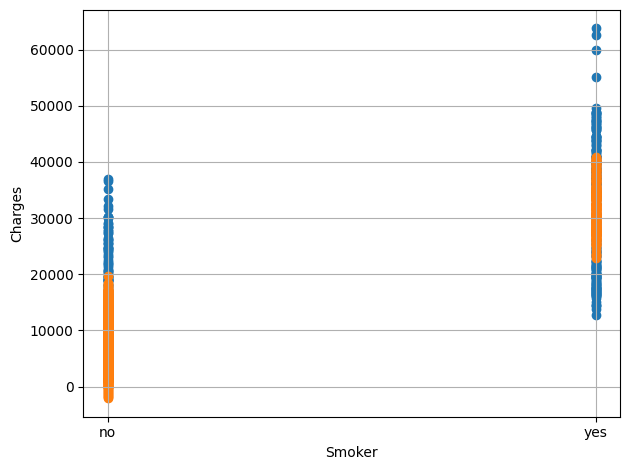

In [21]:
plt.scatter(df_train['smoker'],df_train['charges'])
plt.scatter(df_train['smoker'],y_hat)
plt.xlabel('Smoker')
plt.ylabel('Charges')

plt.grid(True)
plt.tight_layout()
plt.show()

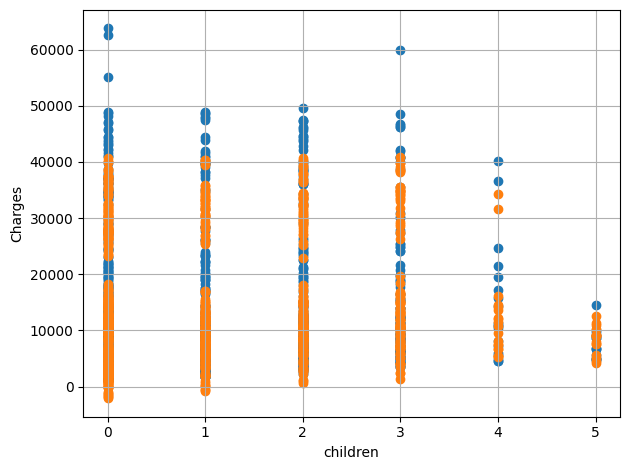

In [22]:
plt.scatter(df_train['children'],df_train['charges'])
plt.scatter(df_train['children'],y_hat)
plt.xlabel('children')
plt.ylabel('Charges')

plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
print(f"MSE: {mean_squared_error(y_test, y_hat)}")
print(f"R2 Score: {r2_score(y_train, y_hat)}")

MSE: 35978294.99749537
R2 Score: 0.7548138912479373
